In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [4]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFwe, f_regression

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [6]:
dataset = pd.read_csv('Heart_Disease_Prediction.csv',sep=',',encoding="utf-8")

In [7]:
type(dataset)
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [8]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,1
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,1
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,1
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,1


In [10]:
Y = dataset['target'].values
X = dataset.drop('target',axis=1).values

In [11]:
X.shape

(270, 13)

In [12]:
Y.shape

(270,)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 216 records and Testing features have 54 records.


In [14]:
print('--------------Training Set----------------')
print(X_train.shape)
print(Y_train.shape)
print('----------------Test Set------------------')
print(X_test.shape)
print(Y_test.shape)

--------------Training Set----------------
(216, 13)
(216,)
----------------Test Set------------------
(54, 13)
(54,)


Random Forest Classifier

In [15]:
max_accuracy = 0

for x in range(500):
    rf_classifier = RandomForestClassifier(random_state=x)
    rf_classifier.fit(X_train,Y_train)
    Y_pred_rf = rf_classifier.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

print(max_accuracy)
print(best_x)

85.19
135


In [16]:
rf_classifier = RandomForestClassifier(random_state=best_x)
rf_classifier.fit(X_train,Y_train)
Y_pred_rf = rf_classifier.predict(X_test)
Y_pred_rf.shape

(54,)

In [17]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
score_rf

85.19

Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Random Forest,0.851852,0.866667,0.866667,0.866667,0.866667,0.85,19.188653,0.7


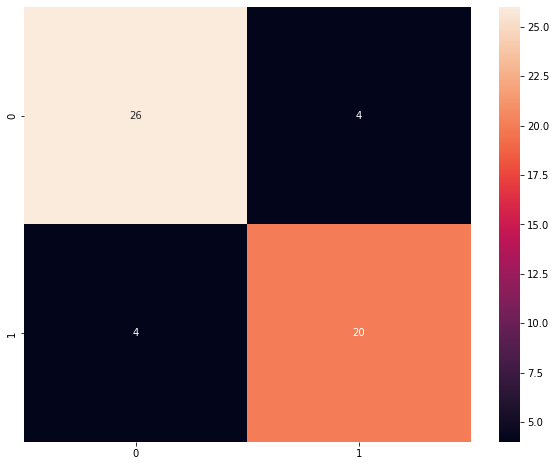

In [18]:
y_pred_rfe = rf_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(Y_test,y_pred_rfe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_rfe)
acc= accuracy_score(Y_test, y_pred_rfe)
roc=roc_auc_score(Y_test, y_pred_rfe)
prec = precision_score(Y_test, y_pred_rfe)
rec = recall_score(Y_test, y_pred_rfe)
f1 = f1_score(Y_test, y_pred_rfe)

mathew = matthews_corrcoef(Y_test, y_pred_rfe)
model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [19]:
Y_pred_rf = np.around(Y_pred_rf) 
print(metrics.classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        30
           2       0.83      0.83      0.83        24

    accuracy                           0.85        54
   macro avg       0.85      0.85      0.85        54
weighted avg       0.85      0.85      0.85        54



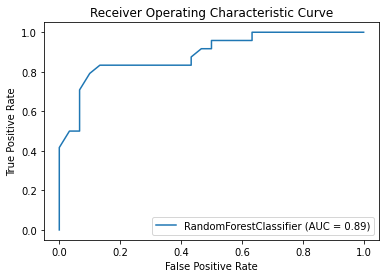

In [20]:
plot_roc_curve(rf_classifier,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("RF.png")

K-Nearest Neighbours

In [21]:
knn_classifier= KNeighborsClassifier(n_neighbors=31,leaf_size=30)
knn_classifier.fit(X_train,Y_train)
Y_pred_knn = knn_classifier.predict(X_test)
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
score_knn

64.81

Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,K-Nearest Neighbors,0.648148,0.689655,0.666667,0.666667,0.677966,0.645833,19.188653,0.290659


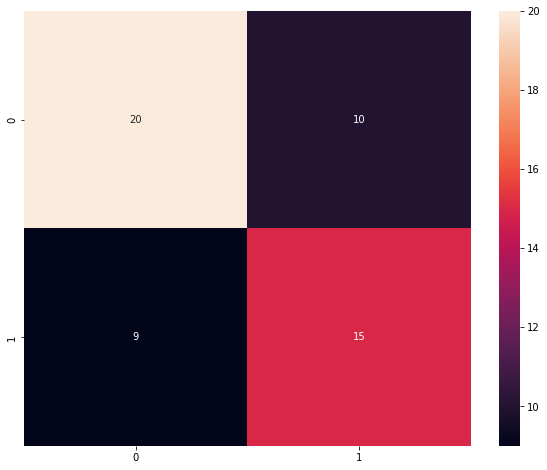

In [22]:
y_pred_knne = knn_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(Y_test,y_pred_knne)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_knne)
acc= accuracy_score(Y_test, y_pred_knne)
roc=roc_auc_score(Y_test, y_pred_knne)
prec = precision_score(Y_test, y_pred_knne)
rec = recall_score(Y_test, y_pred_knne)
f1 = f1_score(Y_test, y_pred_knne)

mathew = matthews_corrcoef(Y_test, y_pred_knne)
model_results =pd.DataFrame([['K-Nearest Neighbors ',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [23]:
Y_pred_knn = np.around(Y_pred_knn) 
print(metrics.classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           1       0.69      0.67      0.68        30
           2       0.60      0.62      0.61        24

    accuracy                           0.65        54
   macro avg       0.64      0.65      0.65        54
weighted avg       0.65      0.65      0.65        54



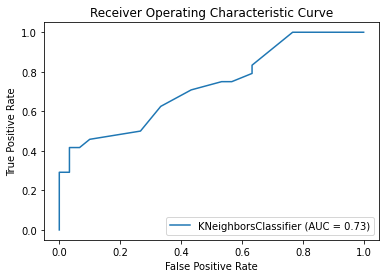

In [24]:
plot_roc_curve(knn_classifier,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("KNN.png")

Decision Tree Classifier

In [25]:
dt_classifier = DecisionTreeClassifier(
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.00001,
    max_features='auto',
    random_state=46)
dt_classifier.fit(X_train, Y_train)
Y_pred_dt=dt_classifier.predict(X_test)
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
score_dt

70.37

Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Decision Tree,0.703704,0.733333,0.733333,0.733333,0.733333,0.7,19.188653,0.4


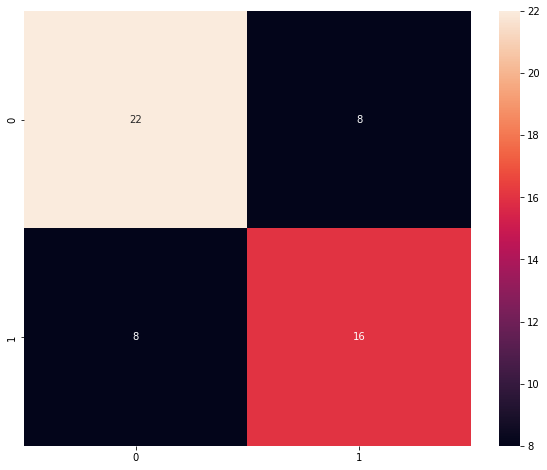

In [26]:
y_pred_dte = dt_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(Y_test,y_pred_dte)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_dte)
acc= accuracy_score(Y_test, y_pred_dte)
roc=roc_auc_score(Y_test, y_pred_dte)
prec = precision_score(Y_test, y_pred_dte)
rec = recall_score(Y_test, y_pred_dte)
f1 = f1_score(Y_test, y_pred_dte)

mathew = matthews_corrcoef(Y_test, y_pred_dte)
model_results =pd.DataFrame([['Decision Tree',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [27]:
Y_pred_dt = np.around(Y_pred_dt)
print(metrics.classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

           1       0.73      0.73      0.73        30
           2       0.67      0.67      0.67        24

    accuracy                           0.70        54
   macro avg       0.70      0.70      0.70        54
weighted avg       0.70      0.70      0.70        54



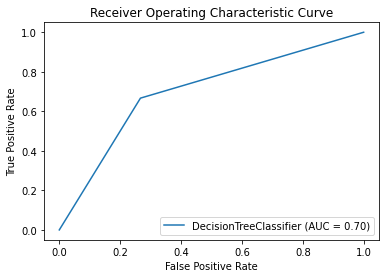

In [28]:
plot_roc_curve(dt_classifier,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

Naive Bayes Classifier

In [29]:
nb_classifier = GaussianNB( var_smoothing=1e-50)
nb_classifier.fit(X_train,Y_train)
nb_classifier.predict(X_test)
Y_pred_nb = nb_classifier.predict(X_test)          
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
score_nb

74.07

Model Evaluation

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC,Log_Loss,mathew_corrcoef
0,Naive Bayes,0.740741,0.766667,0.766667,0.766667,0.766667,0.7375,19.188653,0.475


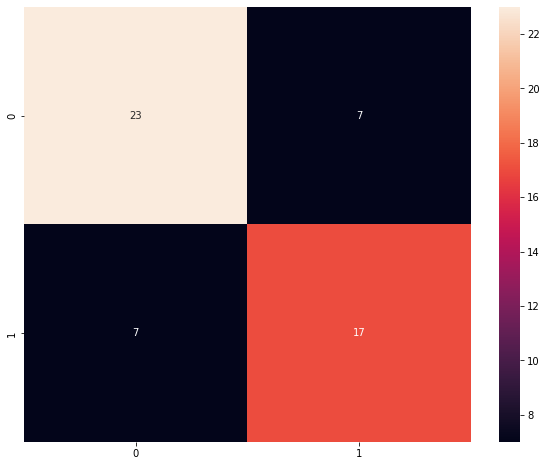

In [30]:
y_pred_nbe = nb_classifier.predict(X_test)

plt.figure(figsize=(10, 8))
CM=confusion_matrix(Y_test,y_pred_nbe)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
loss_log = log_loss(Y_test, y_pred_nbe)
acc= accuracy_score(Y_test, y_pred_nbe)
roc=roc_auc_score(Y_test, y_pred_nbe)
prec = precision_score(Y_test, y_pred_nbe)
rec = recall_score(Y_test, y_pred_nbe)
f1 = f1_score(Y_test, y_pred_nbe)

mathew = matthews_corrcoef(Y_test, y_pred_nbe)
model_results =pd.DataFrame([['Naive Bayes ',acc, prec,rec,specificity, f1,roc, loss_log,mathew]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC','Log_Loss','mathew_corrcoef'])

model_results

In [31]:
Y_pred_nb = np.around(Y_pred_nb)
print(metrics.classification_report(Y_test,Y_pred_nb))

              precision    recall  f1-score   support

           1       0.77      0.77      0.77        30
           2       0.71      0.71      0.71        24

    accuracy                           0.74        54
   macro avg       0.74      0.74      0.74        54
weighted avg       0.74      0.74      0.74        54



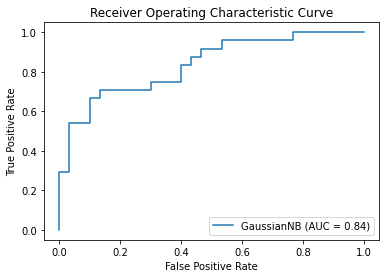

In [32]:
plot_roc_curve(nb_classifier,X_test,Y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');
plt.savefig("GNB.png")

Final Selection of the ML Model

In [33]:
scores = [score_rf,score_knn,score_nb,score_dt]
Models = ["Random Forest Classifier"," K-Nearest Neighbors Classifier","Navie Bayes Classifier","Decision Tree Classifier"]    

for i in range(len(Models)):
    print("The accuracy score achieved using "+Models[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest Classifier is: 85.19 %
The accuracy score achieved using  K-Nearest Neighbors Classifier is: 64.81 %
The accuracy score achieved using Navie Bayes Classifier is: 74.07 %
The accuracy score achieved using Decision Tree Classifier is: 70.37 %


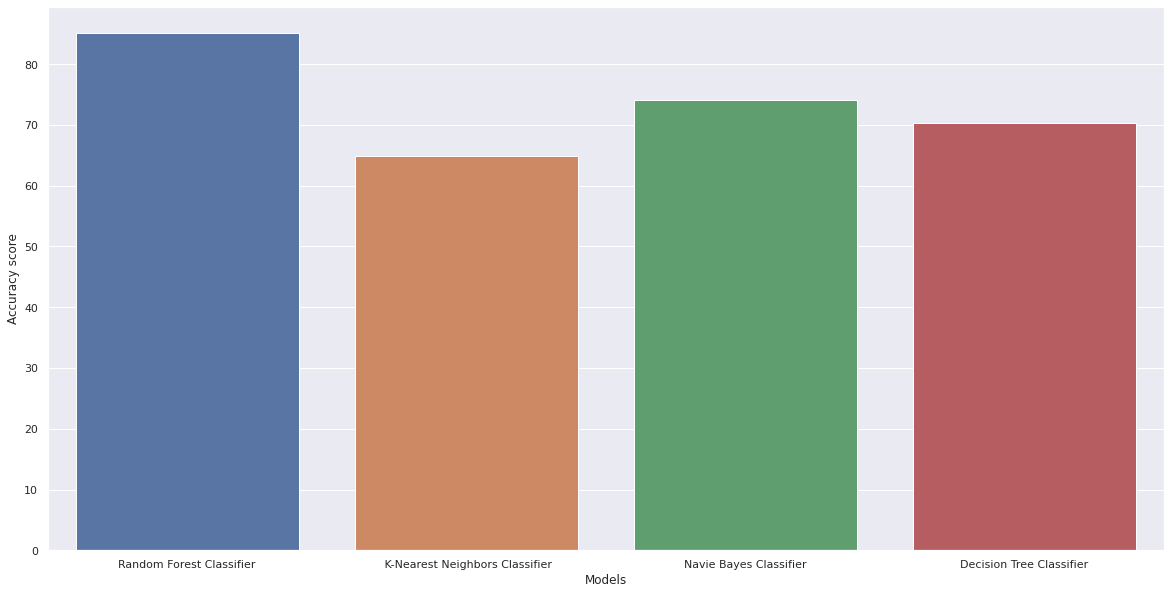

In [34]:
sns.set(style="darkgrid",rc={'figure.figsize':(20,10)})
plt.xlabel("Models")
plt.ylabel("Accuracy score")

sns.barplot(Models,scores)
plt.savefig("AccuracyScores.png")